NB to plot arbitrary OLS policies for the paper

In [78]:
import numpy as np
import matplotlib.pyplot as plt

Intersection:  5.683333333333334
Intersection:  7.5
Intersection:  4.775


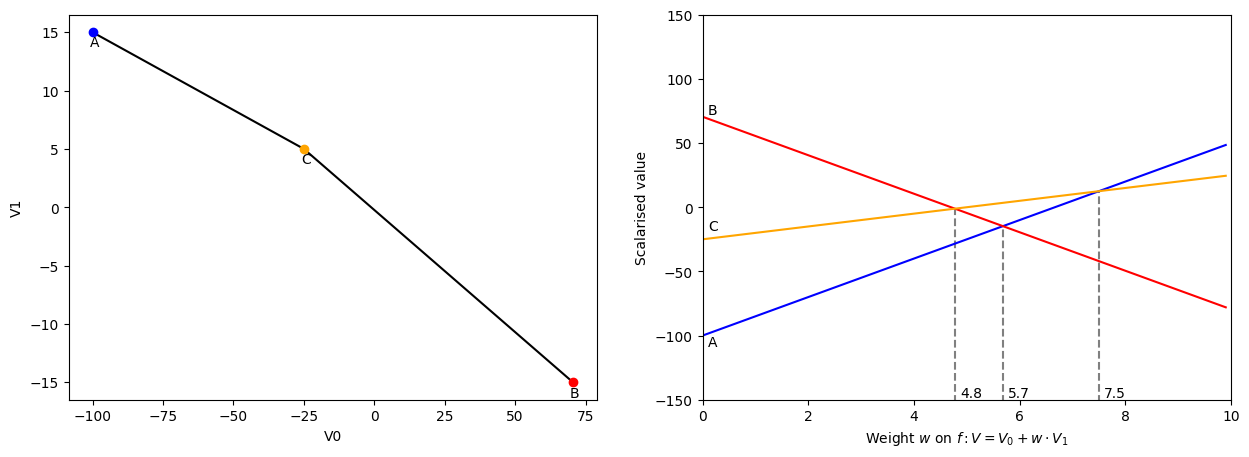

\begin{tabular}{|c|c|c|}
\hline
Policy & $V_0$ & $V_1$ \\
\hline
A & -100 & 15 \\
B & 70.5 & -15.0 \\
C & -25 & 5 \\
\hline
\end{tabular}


In [120]:
# single agent
def single_agent_ols_policy(policies, plot_intersections=True, exclude=None, orange=[], red=[], blue=[]):
    # names for the policies. index on the list -> letter on the alphabet
    names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    
    extras = [[-30.9,0], [-75, -10], [-80, 10], [40, -15]]
    extras = []
    
    if exclude is None:
        exclude = []
        
    step = 0.1
    max_weight = 10
    x = np.arange(0, max_weight, step)
    w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # Plot
    for idx, policy in enumerate(policies+extras):
        if any([np.equal(b, policy).all() for b in orange]):
            axs[1].plot(x, np.dot(policy, w), color="orange")
            axs[1].text(0.1, policy[0] + 5, names[idx], verticalalignment='bottom')
        elif any(np.equal(r, policy).all() for r in red):
            axs[1].plot(x, np.dot(policy, w), 'r')
            axs[1].text(0.1, policy[0] - 0.5, names[idx], verticalalignment='bottom')
        elif any(np.equal(b, policy).all() for b in blue):
            axs[1].plot(x, np.dot(policy, w), 'b')
            axs[1].text(0.1, policy[0] - 10.5, names[idx], verticalalignment='bottom')
        else:
            axs[1].plot(x, np.dot(policy, w), color="lightgray", linestyle="dotted")
        
        
    axs[1].set_ylabel('Scalarised value')
    axs[1].set_xlabel('Weight $w$ on $f: V = V_0 + w \cdot V_1$')
    axs[1].set_xlim([0, 10])
    axs[1].set_ylim([-150, 150])
    
    if plot_intersections:
        # compute pair-wise intersections of the policy vectors
        def get_intersection(policy1, policy2):
            return (policy1[0] - policy2[0]) / (policy2[1] - policy1[1])
        
        for i, policy1 in enumerate(policies):
            for j, policy2 in enumerate(policies):
                if i < j:
                    intersection = get_intersection(policy1, policy2)
                    print("Intersection: ", intersection)
                    if 0 <= intersection <= 10 and intersection not in exclude:
                        axs[1].text(intersection+0.1, -150, f'{intersection:.1f}', verticalalignment='bottom')
                    y = np.dot(policy1, [1, intersection])
                    axs[1].plot([intersection, intersection], [-400, y], color="gray", linestyle="--", label='Intersection', zorder=-1)
    
    # Plot the convex hull
    
    policies_as_points = np.array(policies + extras) # we add some suboptimal policies to make the CH shine
    axs[0].set_xlabel('V0')
    axs[0].set_ylabel('V1')
    for idx, policy in enumerate(policies_as_points):
        if any([np.equal(b, policy).all() for b in orange]):
            axs[0].plot(policy[0], policy[1], color="orange", marker='o', zorder=2)
        elif any([np.equal(r, policy).all() for r in red]):
            axs[0].plot(policy[0], policy[1], 'ro', zorder=2)
        elif any([np.equal(b, policy).all() for b in blue]):
            axs[0].plot(policy[0], policy[1], 'bo', zorder=2)
        else:
            axs[0].plot(policy[0], policy[1], color="lightgray", marker='x', zorder=2)
        # plot the name of the policy next to the point
        axs[0].text(policy[0]-1, policy[1]-1.5, names[idx], verticalalignment='bottom')
    
    # Plot lines between the pair of points that are on the convex hull. Just plot lines between the sorted list by x-axis
    if len(extras) > 0:
        policies_as_points = policies_as_points[policies_as_points[:-len(extras),0].argsort()]
    else:
        policies_as_points = policies_as_points[policies_as_points[:,0].argsort()]
    for i in range(len(policies_as_points)-1):
        axs[0].plot([policies_as_points[i][0], policies_as_points[i+1][0]], [policies_as_points[i][1], policies_as_points[i+1][1]], 'black', zorder=-1)
    plt.show()
    
    
    if True:
        # policies as latex table
        print("\\begin{tabular}{|c|c|c|}")
        print("\\hline")
        print("Policy & $V_0$ & $V_1$ \\\\")
        print("\\hline")
        for idx, policy in enumerate(policies+extras):
            print(f"{names[idx]} & {policy[0]} & {policy[1]} \\\\")
        print("\\hline")
        print("\\end{tabular}")

ref = np.array([-100, 15])
midd = np.array([-25, 5])
uneth = np.array([70.5, -15])
single_agent_ols_policy([ref, uneth, midd], exclude=[], red=[uneth], orange=[midd], blue=[ref], plot_intersections=True)